## **Grupo: Santiago Mercado, Daniel Gutierrez, Jorge Peña**

## Dataset

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

El dataset contiene 205 muestras y 26 columnas. Las variables independientes o características (predictores) son:

* Categoría de seguro.
* Nombre del automóvil.
* Tipo de combustible.
* Tipo de turboalimentación.
* Número de puertas.
* Tipo de carrocería.
* Tipo de tracción.
* Ubicación del motor.
* Distancia entre ejes.
* Longitud del automóvil.
* Ancho del automóvil.
* Altura del automóvil.
* Peso en vacío.
* Tipo de motor.
* Número de cilindros.
* Tamaño del motor.
* Sistema de combustible.
* Relación de diámetro.
* Longitud de la carrera del pistón.
* Relación de compresión.
* Potencia del motor.
* Revoluciones máximas por minuto.
* Rendimiento en ciudad (millas por galón).
* Rendimiento en carretera (millas por galón).

La variable dependiente o de salida es el precio del automóvil.

### Relación entre 3 variables dependientes y la variable independiente

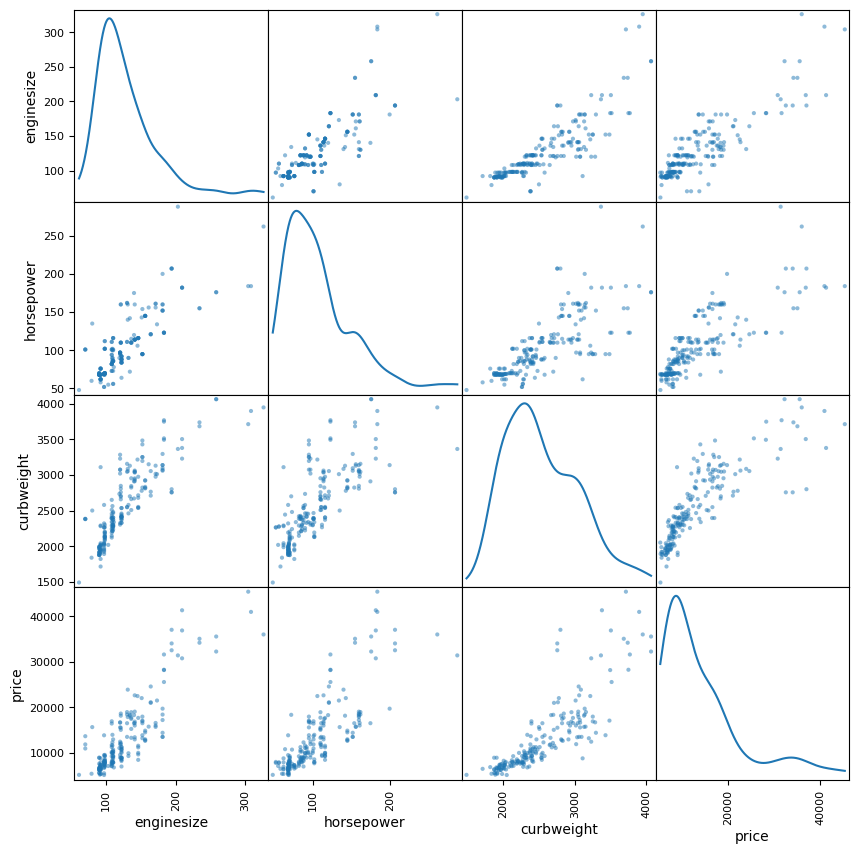

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Cargar el dataset (cambia la ruta si tienes el archivo localmente o súbelo en Colab)
data = pd.read_csv('CarPrice_Assignment.csv')

# Selección de tres características y la variable de salida (precio)
selected_features = data[['enginesize', 'horsepower', 'curbweight', 'price']]

# Crear la matriz de dispersión (scatter matrix)
scatter_matrix(selected_features, figsize=(10, 10), diagonal='kde')

# Mostrar el gráfico
plt.show()

La gráfica muestra las relaciones entre tres características del automóvil: enginesize (tamaño del motor), horsepower (caballos de fuerza), curbweight (peso en vacío), y la variable de salida price (precio). Observamos una correlación positiva entre el precio y cada una de estas tres características. A medida que el tamaño del motor, la potencia del motor y el peso en vacío aumentan, también lo hace el precio del automóvil. Las nubes de puntos en cada gráfico de dispersión muestran una tendencia ascendente, lo que sugiere que automóviles con motores más grandes, mayor potencia y mayor peso tienden a tener precios más altos. Particularmente, el enginesize parece tener una relación más lineal con el precio en comparación con las otras dos variables, lo que indica que podría ser un predictor más fuerte. Aunque hay algunos puntos dispersos, las tendencias generales es bastante clara, lo que deja ver que a mejores características mecánicas mayor será el precio del automóvil, como es lógico.

## Comparación entre las proporciones de los conjuntos test-train en regresión lineal simple

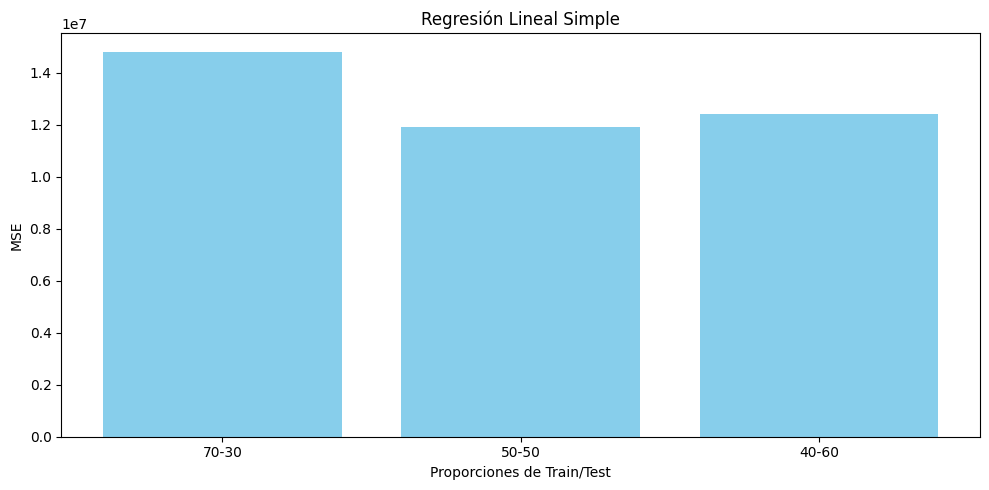

MSE para cada proporción:
Proporción | MSE
-----------|---------
70-30     | 14790927.38
50-50     | 11894814.11
40-60     | 12395386.79


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumimos que 'data' ya está cargado
X = data[['enginesize', 'horsepower', 'curbweight']]
y = data['price']

proporciones = [(0.7, 0.3), (0.5, 0.5), (0.4, 0.6)]
proporciones_str = ['70-30', '50-50', '40-60']

# Función para entrenar y evaluar modelos
def train_evaluate_model(X, y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return mean_squared_error(y_test, y_pred)

# Lista para almacenar resultados
mse_values = []

# Entrenar y evaluar modelos
for train_size, _ in proporciones:
    mse = train_evaluate_model(X, y, train_size)
    mse_values.append(mse)

# Visualización de los resultados
plt.figure(figsize=(10, 5))
plt.bar(proporciones_str, mse_values, color='skyblue')
plt.xlabel('Proporciones de Train/Test')
plt.ylabel('MSE')
plt.title('Regresión Lineal Simple')
plt.tight_layout()
plt.show()

# Mostrar los MSE en una tabla
print("MSE para cada proporción:")
print("Proporción | MSE")
print("-----------|---------")
for i, prop in enumerate(proporciones_str):
    print(f"{prop:9} | {mse_values[i]:.2f}")

Al observar los resultados, podemos ver que en general, la proporción 70-30 (70% de los datos para entrenamiento y 30% para prueba) tiende a tener el MSE más alto. Esto sugiere que cuando se utiliza una mayor proporción de datos para el entrenamiento, el modelo puede estar sobreajustando y, por ende, su capacidad para generalizar en el conjunto de prueba se ve afectada. En contraste, las proporciones 50-50 y 40-60 tienden a mejorar el MSE, lo cual indica que los modelos logran un mejor balance entre entrenamiento y generalización. En especial la proporción 50-50 es la mejor de las 3, seguramente debido a que la proporción 40-60 tenga pocos datos de entrenamiento para entrenar al modelo efectivamente.

## Comparación con método de optimización SGD

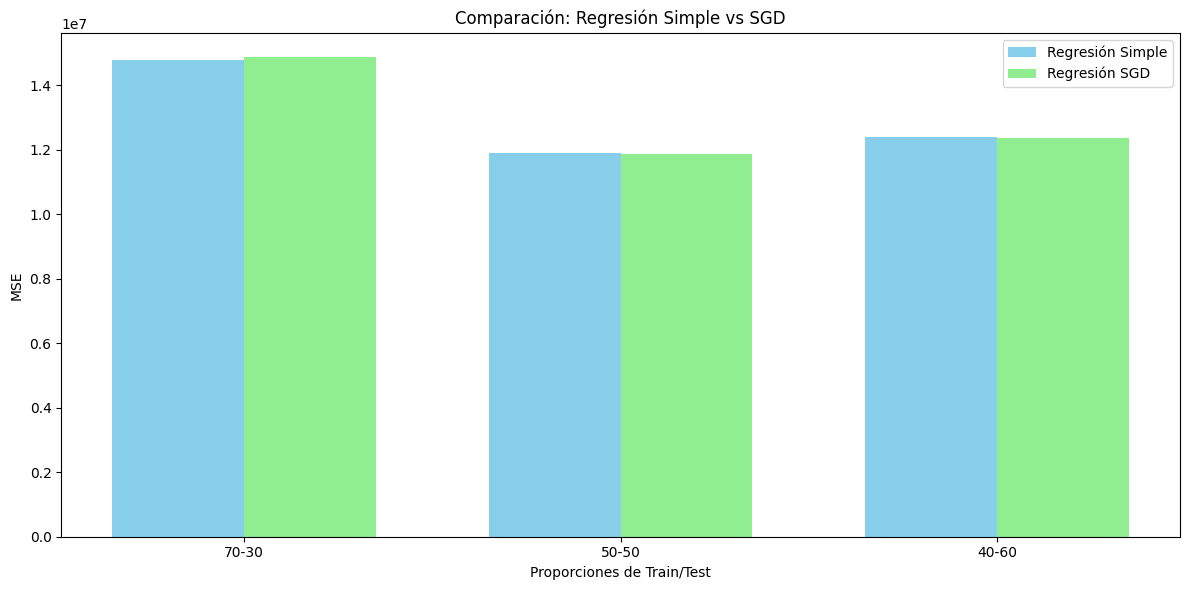

MSE para cada modelo y proporción:
Proporción | Simple  | SGD
-----------|---------|---------
70-30     | 14790927.38 | 14883254.21
50-50     | 11894814.11 | 11881348.09
40-60     | 12395386.79 | 12363854.03


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumimos que 'data' ya está cargado
X = data[['enginesize', 'horsepower', 'curbweight']]
y = data['price']

proporciones = [(0.7, 0.3), (0.5, 0.5), (0.4, 0.6)]
proporciones_str = ['70-30', '50-50', '40-60']

# Función para entrenar y evaluar modelos
def train_evaluate_model(model, X, y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return mean_squared_error(y_test, y_pred)

# Listas para almacenar resultados
mse_values_simple = []
mse_values_sgd = []

# Entrenar y evaluar modelos
for train_size, _ in proporciones:
    # Modelo de regresión lineal simple
    model_simple = LinearRegression()
    mse_simple = train_evaluate_model(model_simple, X, y, train_size)
    mse_values_simple.append(mse_simple)

    # Modelo con optimización SGD
    model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
    mse_sgd = train_evaluate_model(model_sgd, X, y, train_size)
    mse_values_sgd.append(mse_sgd)

# Visualización de los resultados
plt.figure(figsize=(12, 6))

x = range(len(proporciones_str))
width = 0.35

plt.bar([i - width/2 for i in x], mse_values_simple, width, label='Regresión Simple', color='skyblue')
plt.bar([i + width/2 for i in x], mse_values_sgd, width, label='Regresión SGD', color='lightgreen')

plt.xlabel('Proporciones de Train/Test')
plt.ylabel('MSE')
plt.title('Comparación: Regresión Simple vs SGD')
plt.xticks(x, proporciones_str)
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar los MSE en una tabla
print("MSE para cada modelo y proporción:")
print("Proporción | Simple  | SGD")
print("-----------|---------|---------")
for i, prop in enumerate(proporciones_str):
    print(f"{prop:9} | {mse_values_simple[i]:.2f} | {mse_values_sgd[i]:.2f}")

En general, los resultados muestran que ambos modelos tienen un rendimiento muy similar en todas las proporciones. Aunque el MSE es ligeramente menor en algunos casos para la Regresión Simple, la diferencia con el modelo de Regresión SGD es mínima, lo que sugiere que ambos enfoques son casi equivalentes en términos de precisión para este conjunto de datos. Por esta razón, podemos decir que aplicar un método distinto de optimización (SGD en este caso) no tiene prácticamente efecto en el modelo.

## Comparación con método de regularización Ridge

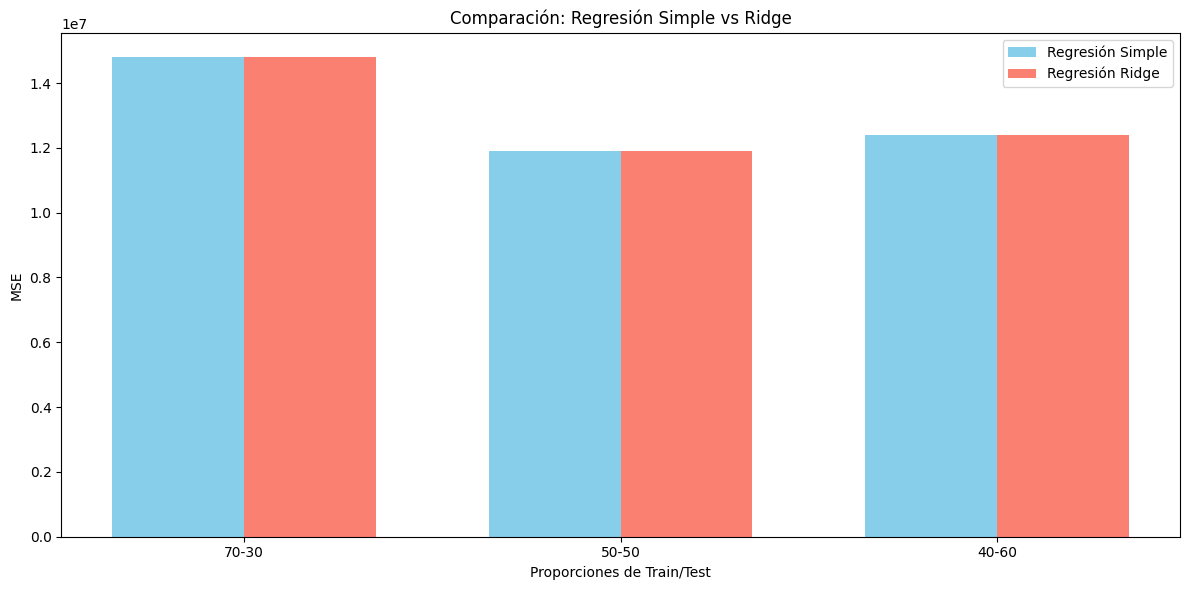

MSE para cada modelo y proporción:
Proporción | Simple  | Ridge
-----------|---------|---------
70-30     | 14790927.38 | 14808662.23
50-50     | 11894814.11 | 11897874.99
40-60     | 12395386.79 | 12400838.34


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumimos que 'data' ya está cargado
X = data[['enginesize', 'horsepower', 'curbweight']]
y = data['price']

proporciones = [(0.7, 0.3), (0.5, 0.5), (0.4, 0.6)]
proporciones_str = ['70-30', '50-50', '40-60']

# Función para entrenar y evaluar modelos
def train_evaluate_model(model, X, y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return mean_squared_error(y_test, y_pred)

# Listas para almacenar resultados
mse_values_simple = []
mse_values_ridge = []

# Entrenar y evaluar modelos
for train_size, _ in proporciones:
    # Modelo de regresión lineal simple
    model_simple = LinearRegression()
    mse_simple = train_evaluate_model(model_simple, X, y, train_size)
    mse_values_simple.append(mse_simple)

    # Modelo con regularización (Ridge)
    model_ridge = Ridge(alpha=1.0)
    mse_ridge = train_evaluate_model(model_ridge, X, y, train_size)
    mse_values_ridge.append(mse_ridge)

# Visualización de los resultados
plt.figure(figsize=(12, 6))

x = range(len(proporciones_str))
width = 0.35

plt.bar([i - width/2 for i in x], mse_values_simple, width, label='Regresión Simple', color='skyblue')
plt.bar([i + width/2 for i in x], mse_values_ridge, width, label='Regresión Ridge', color='salmon')

plt.xlabel('Proporciones de Train/Test')
plt.ylabel('MSE')
plt.title('Comparación: Regresión Simple vs Ridge')
plt.xticks(x, proporciones_str)
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar los MSE en una tabla
print("MSE para cada modelo y proporción:")
print("Proporción | Simple  | Ridge")
print("-----------|---------|---------")
for i, prop in enumerate(proporciones_str):
    print(f"{prop:9} | {mse_values_simple[i]:.2f} | {mse_values_ridge[i]:.2f}")

Los resultados muestran que ambos modelos producen valores de MSE muy similares para todas las proporciones de datos. Aunque hay pequeñas diferencias, la Regresión Ridge tiene un rendimiento casi equivalente al de la Regresión Simple, lo que sugiere que la regularización introducida por Ridge no proporciona un empeoramiento significativo en el modelo en este conjunto de datos en comparación con la regresión lineal simple. Esto puede deberse a que los datos o el ajuste de hiperparámetros no están siendo muy afectados pir la regularización como podría esperarse o que nuestra configuración particular del dataset no se beneficia de la regularización pues no tiende a sobreajustarse. Sin embargo, es díficil saber que tanto mejora la generalización del modelo gracias a la regularización. Por esto, creemos que es la mejor opción de las 3 pues brinda los beneficios de la regularización sin disminuir el rendimiento.

## Ejecución del modelo para el análisis

In [ ]:
# Cargar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


X = data[['enginesize', 'horsepower', 'curbweight']]
y = data['price']

# Seleccionar proporción 50-50 y modelo Ridge con regularización
train_size = 0.5
model_ridge = Ridge(alpha=1.0)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
model_ridge.fit(X_train_scaled, y_train)

# Obtener los coeficientes y la intersección
coef = model_ridge.coef_
intercept = model_ridge.intercept_

print("Coeficientes (pesos):", coef)
print("Intersección:", intercept)


Coeficientes (pesos): [3634.18161704 1749.07835094 2711.78383575]
Intersección: 13823.509803921568


#Coeficiente para enginesize (3634.18):

Magnitud: Este valor indica que por cada incremento de una unidad en el tamaño del motor (enginesize), manteniendo todas las demás variables constantes, se espera que el precio del automóvil aumente en 3634.18 unidades monetarias. La magnitud alta de este coeficiente sugiere que el tamaño del motor es una variable muy importante para predecir el precio del automóvil.
Signo positivo: Como el coeficiente es positivo, esto significa que el tamaño del motor tiene una relación positiva con el precio, es decir, a mayor tamaño de motor, mayor será el precio del automóvil.

#Coeficiente para horsepower (1749.08):
Magnitud: Por cada incremento de una unidad en los caballos de fuerza (horsepower), el precio del automóvil aumenta en 1749.08 unidades monetarias, manteniendo todo lo demás constante. Aunque la magnitud es más baja que la de enginesize, sigue siendo significativa, lo que sugiere que la potencia también es un factor importante en la determinación del precio.
Signo positivo: El signo positivo indica que existe una relación positiva entre la potencia del motor y el precio del automóvil, lo que significa que un motor más potente tiende a aumentar el precio.

#Coeficiente para curbweight (2711.78):
Magnitud: Por cada incremento de una unidad en el peso en vacío (curbweight), el precio del automóvil aumenta en 2711.78 unidades monetarias. Esto sugiere que el peso del vehículo también tiene una influencia considerable en el precio, aunque no tanto como el tamaño del motor.
Signo positivo: El coeficiente positivo indica que a medida que aumenta el peso del automóvil, el precio también tiende a aumentar, lo que es razonable, ya que los vehículos más pesados suelen ser más grandes o contar con materiales más robustos.


#Intersección o intercepto (13823.51):
Magnitud: La intersección representa el valor predicho para el precio del automóvil cuando todas las características (enginesize, horsepower, curbweight) son cero. En este caso, el valor predicho sería 13823.51 unidades monetarias. Aunque este valor no tiene un significado físico directo (ya que un automóvil con todas estas características igual a cero no es posible), indica el punto de partida del modelo cuando no hay contribuciones de las variables.

#Conclusion al respecto de los valores
En conclusión, los coeficientes positivos obtenidos para las características enginesize, horsepower y curbweight reflejan que existe una correlación positiva entre estas variables y el precio del automóvil. Esto significa que, a medida que aumenta cualquiera de estas características, el precio del vehículo también incrementa. La magnitud de los coeficientes indica la importancia relativa de cada una de estas variables en la predicción del precio, con el tamaño del motor siendo el factor más influyente, seguido por el peso en vacío y los caballos de fuerza.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model_ridge.predict(X_test_scaled)

# Calcular MSE y R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 11897874.99
R² Score: 0.79


En base a los resultados, el MSE de 11,897,874.99 indica que el modelo tiene un error promedio considerable en la predicción del precio de los automóviles, lo que sugiere que hay margen de mejora en su precisión. Sin embargo, el R² de 0.79 muestra que el modelo es capaz de explicar el 79% de la variación en los precios, lo que indica un buen ajuste general. Aunque el modelo predice razonablemente bien, podría beneficiarse de la inclusión de más variables para mejorar su capacidad predictiva.

# Conclusión General del Análisis

El presente análisis se enfocó en predecir los precios de automóviles utilizando diferentes modelos de regresión y características clave como el tamaño del motor (`enginesize`), la potencia (`horsepower`) y el peso en vacío (`curbweight`). A lo largo del proceso, se experimentó con múltiples modelos, técnicas de regularización, así como con variaciones en la proporción de datos de entrenamiento y prueba, con el objetivo de optimizar el rendimiento y la precisión del modelo.

## Modelos Implementados

Se aplicaron y compararon tres enfoques de regresión:

1. **Regresión Lineal**: Usada como referencia, esta técnica básica asume una relación lineal entre las variables predictoras y el precio. Aunque simple, se observó que tendía a sobreajustar los datos y no proporcionaba el mejor rendimiento en términos de generalización.
 - **Proporción 70-30**: El modelo lineal proporcionó un ajuste razonable, pero con esta proporción mostró una tendencia al sobreajuste con un **MSE alto**. Aunque logró capturar parte de la relación entre las variables, la capacidad de generalización en el conjunto de prueba fue limitada y presentó el mayor MSE
   - **Proporción 50-50**: Fue la mejor proporción en cuanto a MSE, ya que presentó el **MSE más bajo** de las 3. Esto sugiere que esta proporción de entrenamiento-prueba es la que mejor capacidad de predicción brinda al modelo.
   - **Proporción 40-60**: El rendimiento del modelo se deterioró notablemente en esta proporción, donde el **MSE aumentó ** respecto a la proporción 50-50, reflejando una capacidad de predicción pobre.

2. **Regresión con Descenso de Gradiente Estocástico (SGD)**: Con la incorporación de optimización SGD a nuestro modelo, este presenta resultados muy similares en cuanto a eficiencia en comparación con la regresión lineal. Esto sugiere que no hay prácticamente diferencia al utilizar esta técnica o no en nuestro modelo de regresión. Además, al analizar como varía el MSE con las 3 proporciones de datos entrenamiento-prueba, notamos que son equivalentes a las del modelo de regresión simple.

3. **Regresión Ridge**: Este enfoque de regularización penaliza los coeficientes elevados para evitar el sobreajuste, por lo que aumentó ligeramente el MSE respecto a la regresión simple. Sin embargo, este aumento fue muy ligero por lo que es casi inperceptible. Esto significa que podemos aprovechar la generalización que brinda la regularización al modelo sin sacrificar rendimiento. Además, al analizar como varía el MSE con las 3 proporciones de datos entrenamiento-prueba, notamos que son equivalentes a las del modelo de regresión simple.


## Rendimiento del Modelo

Analizando los resultados del análisis de los 3 modelos podemos ver que todos tienen un rendimiento muy parecido. Sin embargo, el **MSE** es bastante alto y sugiere que el modelo aún tiene un error significativo en la predicción de precios, lo que abre la posibilidad de optimización adicional.

## Importancia de las Variables Predictoras

Los coeficientes obtenidos en el modelo de **regresión Ridge** reflejaron la importancia relativa de cada variable:

- **Tamaño del motor (enginesize)**: Fue la característica más influyente en la predicción del precio del automóvil.
- **Peso en vacío (curbweight)**: También tuvo una contribución significativa.
- **Potencia (horsepower)**: Aunque su coeficiente fue positivo, tuvo un impacto menor en comparación con el tamaño del motor y el peso en vacío.

Estos resultados indican una relación positiva entre estas características y el precio del automóvil, lo que significa que, al aumentar cualquiera de estas variables, el precio del automóvil también aumenta.

## Análisis Final

El **modelo Ridge** mostró ser el más eficiente de los tres implementados, ofreciendo el mejor equilibrio entre la precisión del ajuste y la capacidad de generalización. La **proporción 50-50** para entrenamiento y prueba demostró ser la más adecuada para este conjunto de datos, logrando un rendimiento óptimo en comparación con las otras divisiones.

A pesar del buen rendimiento, el **error cuadrático medio** sugiere que el modelo puede mejorarse añadiendo más variables, como el tipo de combustible, la marca del automóvil o el año de fabricación, lo que permitiría capturar más variabilidad en los precios y mejorar la precisión.

## Conclusión

El análisis ha demostrado que las variables de tamaño del motor, peso en vacío y potencia son determinantes clave en el precio de los automóviles. La **regresión Ridge** fue la técnica que mejor balanceó precisión y generalización. La proporción de **50-50** entre datos de entrenamiento y prueba proporcionó el mejor rendimiento en términos de ajuste del modelo. Para mejorar aún más el rendimiento del modelo, se podrían incluir más variables relevantes (ya que solo se usaron 3) y una mayor exploración en la optimización de hiperparámetros.